<a href="https://colab.research.google.com/github/Harsha-chikkala/Warehouse-Inventory-Optimization-using-Unsupervised-Learning/blob/main/Warehouse_Space_Utilization_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from umap import UMAP



In [32]:
df= pd.read_csv("/content/supply_chain_data.csv")

In [3]:
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
df.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


In [5]:
df.shape

(100, 24)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [10]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64


In [11]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [12]:
df.columns = df.columns.str.strip().str.replace(' ', '_')

In [13]:
print(df.head())

  Product_type   SKU      Price  Availability  Number_of_products_sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue_generated Customer_demographics  Stock_levels  Lead_times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order_quantities  ...  Location Lead_time  Production_volumes  \
0                96  ...    Mumbai        29          

In [14]:
print(df.columns[df.columns.duplicated()])

Index([], dtype='object')


In [15]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

In [17]:
# Outlier detection using IQR
outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)

print("\nOutlier count per numerical column:")
for k, v in outlier_summary.items():
    print(f"{k}: {v} outliers")




Outlier count per numerical column:
Price: 0 outliers
Availability: 0 outliers
Number_of_products_sold: 0 outliers
Revenue_generated: 0 outliers
Stock_levels: 0 outliers
Lead_times: 0 outliers
Order_quantities: 0 outliers
Shipping_times: 0 outliers
Shipping_costs: 0 outliers
Lead_time: 0 outliers
Production_volumes: 0 outliers
Manufacturing_lead_time: 0 outliers
Manufacturing_costs: 0 outliers
Defect_rates: 0 outliers
Costs: 0 outliers


In [18]:
#feature engineering
# Make a copy to preserve original
df_fe = df.copy()

# 1. Turnover Rate
df_fe['Turnover_rate'] = df_fe['Number_of_products_sold'] / df_fe['Stock_levels']

# 2. Profit Margin
df_fe['Profit_margin'] = df_fe['Revenue_generated'] - df_fe['Costs']

# 3. Manufacturing Efficiency
df_fe['Manufacturing_efficiency'] = df_fe['Production_volumes'] / df_fe['Manufacturing_lead_time']

# 4. Defect Penalty
df_fe['Defect_penalty'] = df_fe['Defect_rates'] * df_fe['Manufacturing_costs']

# Handle inf and NaN
df_fe.replace([np.inf, -np.inf], np.nan, inplace=True)
df_fe.fillna(0, inplace=True)


print(df_fe[['Turnover_rate', 'Profit_margin', 'Manufacturing_efficiency', 'Defect_penalty']].describe())


       Turnover_rate  Profit_margin  Manufacturing_efficiency  Defect_penalty
count     100.000000     100.000000                100.000000      100.000000
mean       28.594887    5246.802405                 76.007217      107.305873
std        70.470740    2738.004606                124.049002       97.784589
min         0.000000     749.044249                  6.055556        0.583098
25%         4.390625    2328.654225                 24.330357       25.093544
50%         8.576627    5410.909666                 40.732919       81.270560
75%        19.751898    7670.418727                 70.750000      163.321228
max       602.000000    9435.829344                793.000000      476.256927


In [20]:
df_fe.describe()

,Price,Availability,Number_of_products_sold,Revenue_generated,Stock_levels,Lead_times,Order_quantities,Shipping_times,Shipping_costs,Lead_time,Production_volumes,Manufacturing_lead_time,Manufacturing_costs,Defect_rates,Costs,Turnover_rate,Profit_margin,Manufacturing_efficiency,Defect_penalty
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782,28.594887,5246.802405,76.007217,107.305873
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696,70.470740,2738.004606,124.049002,97.784589
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248,0.000000,749.044249,6.055556,0.583098
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455,4.390625,2328.654225,24.330357,25.093544
50%,51.239830,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444,8.576627,5410.909666,40.732919,81.270560
75%,77.198228,75.000000,704.250000,8253.976920,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231,19.751898,7670.418727,70.750000,163.321228
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450,602.000000,9435.829344,793.000000,476.256927


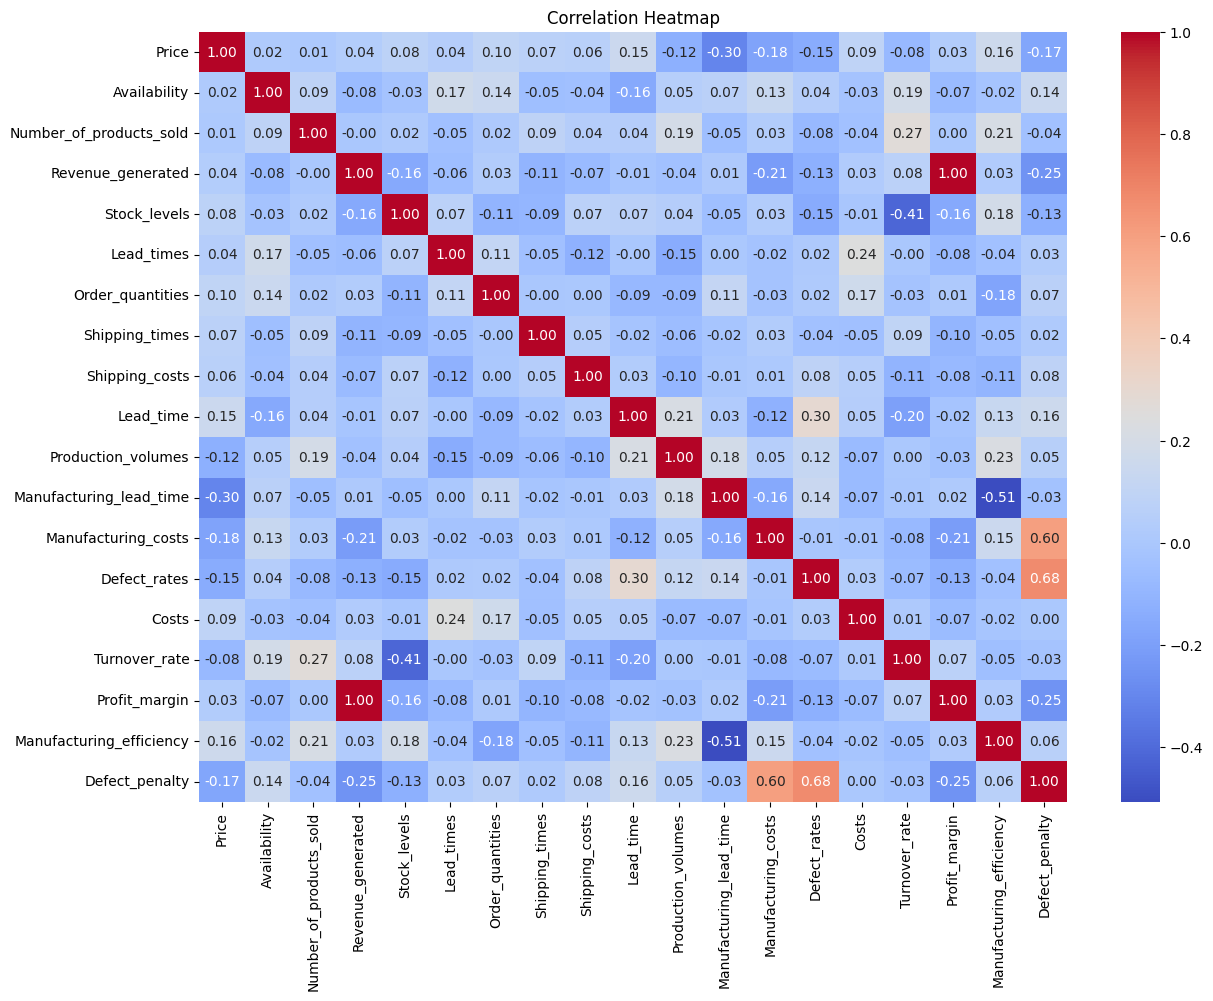

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df_fe.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

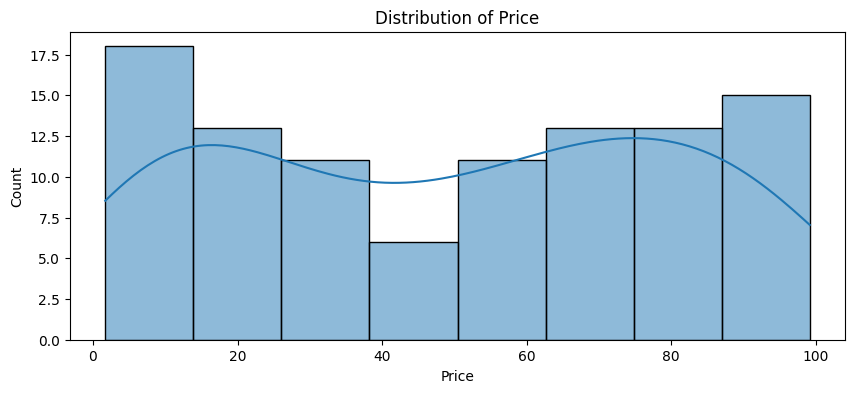

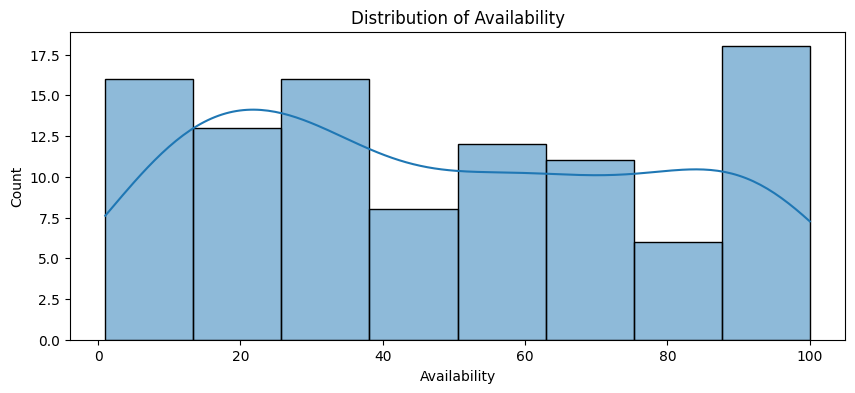

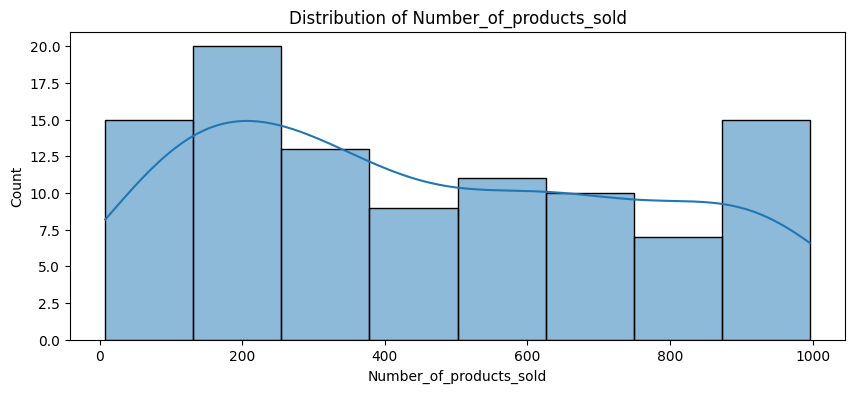

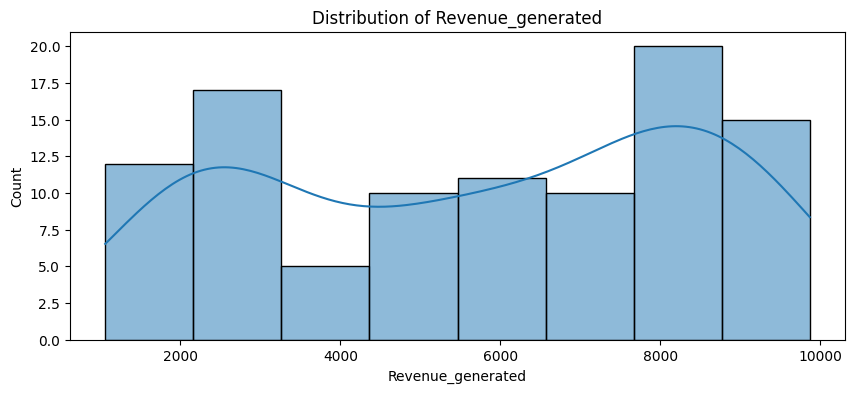

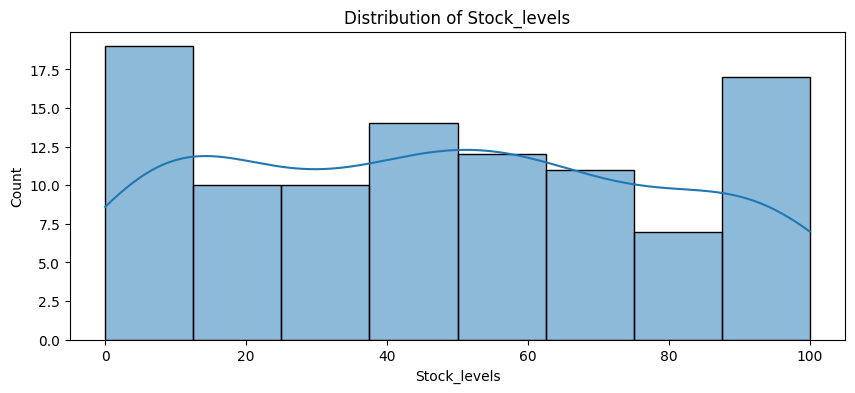

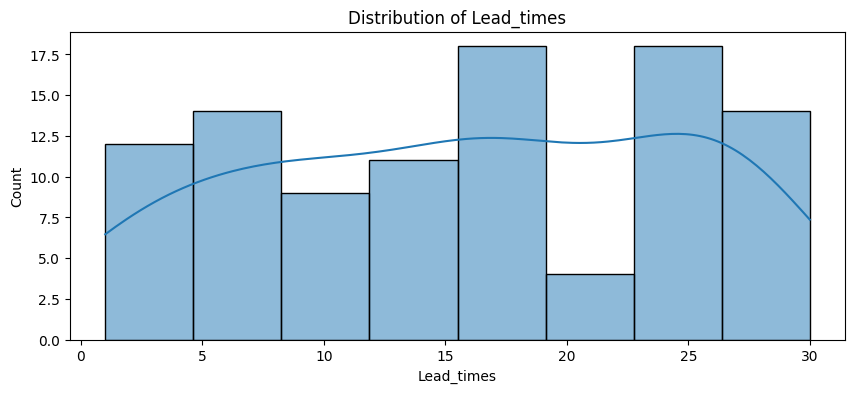

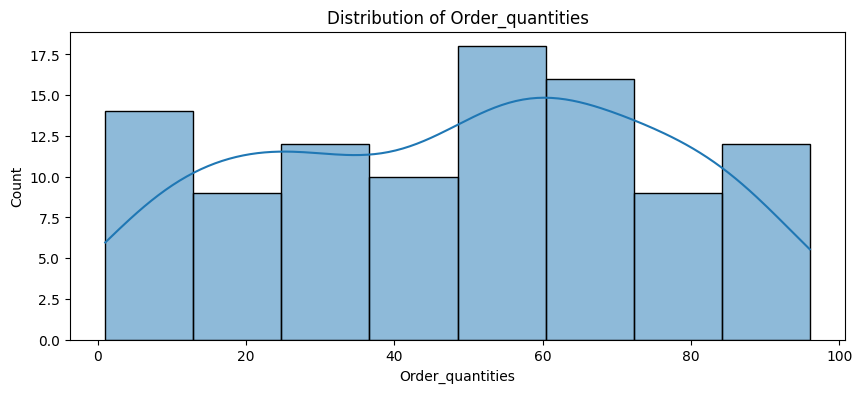

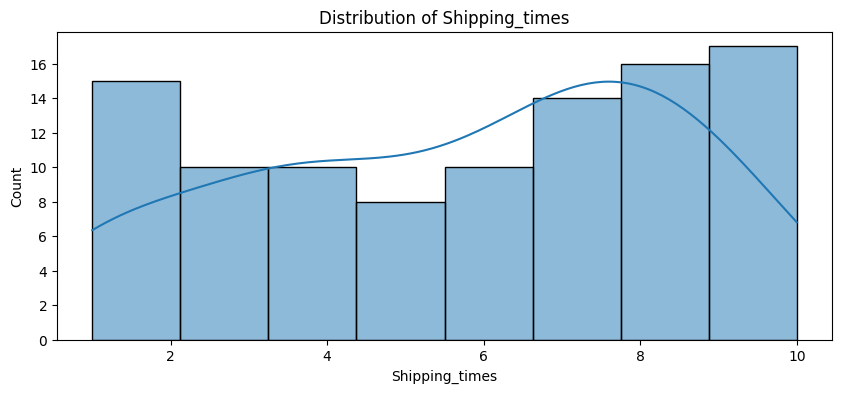

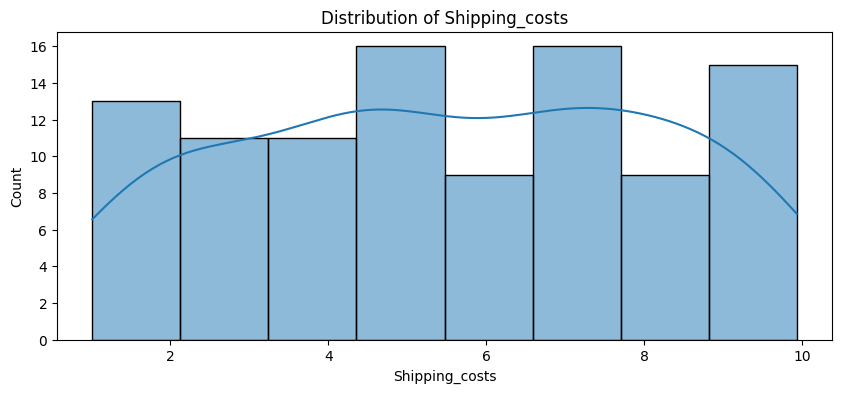

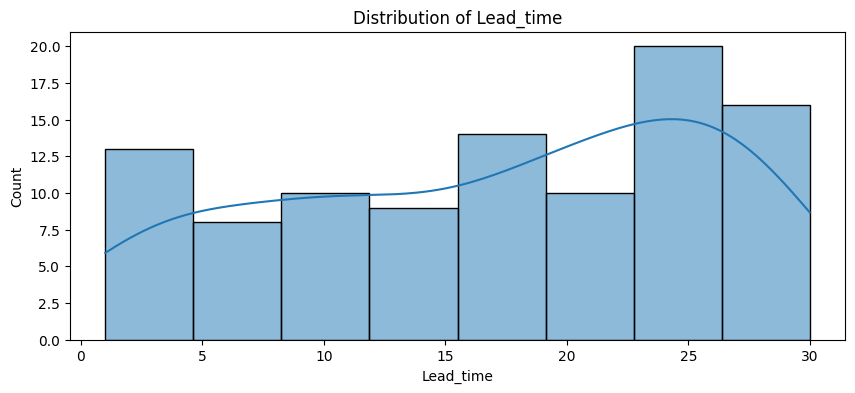

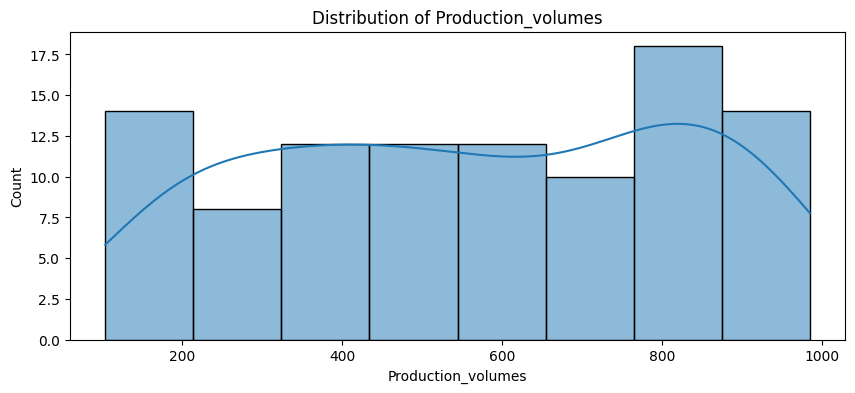

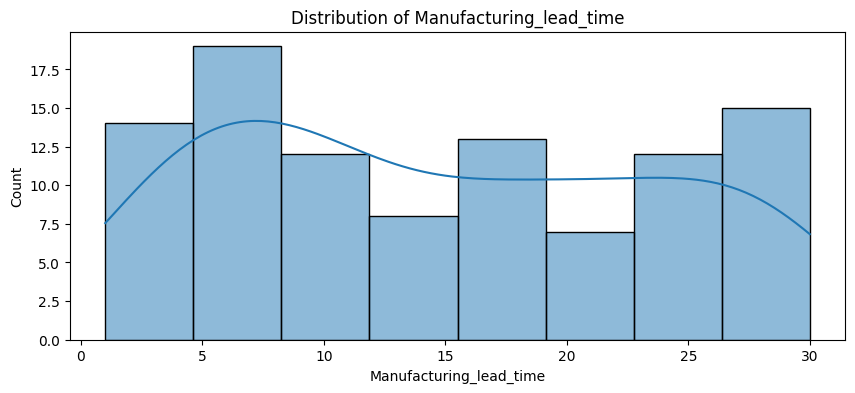

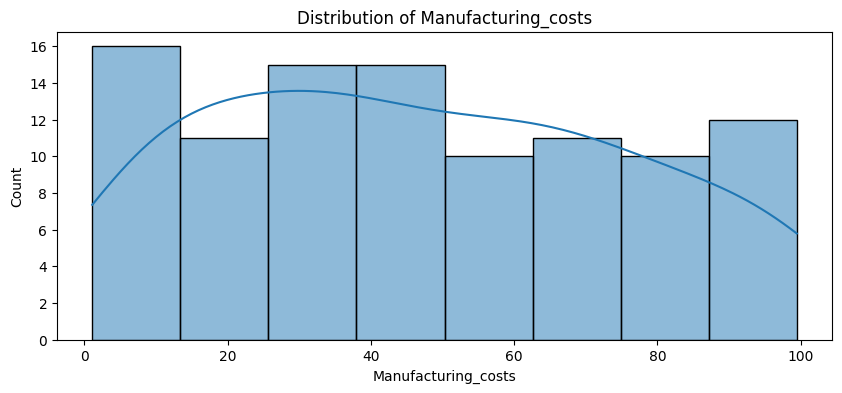

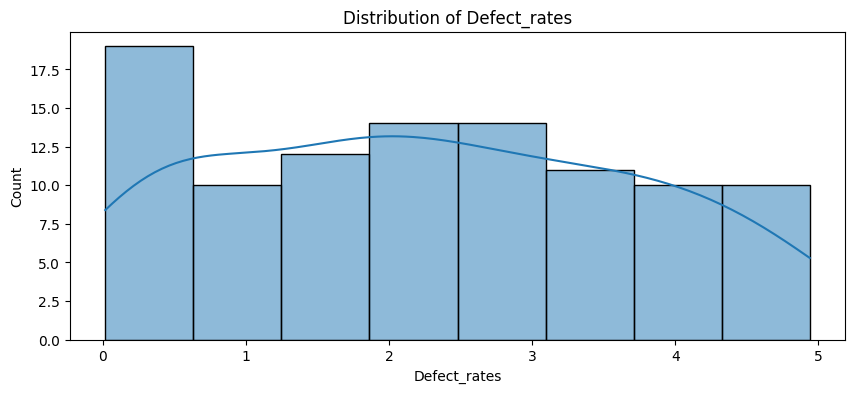

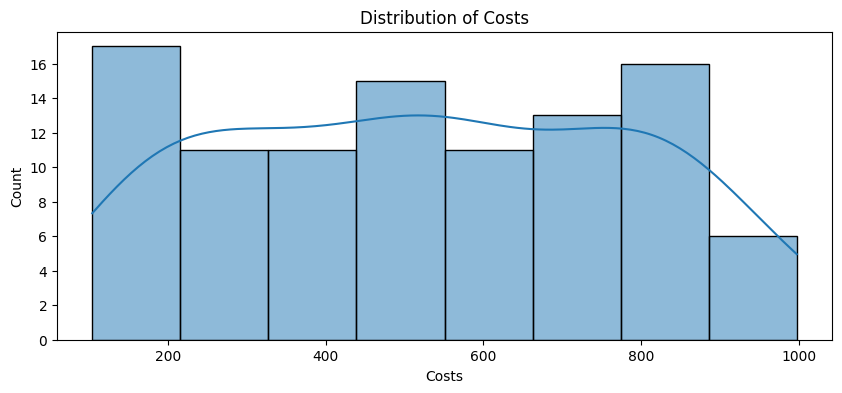

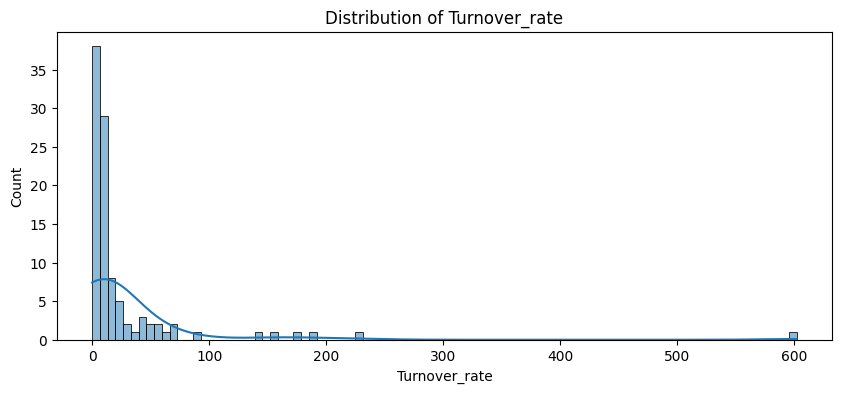

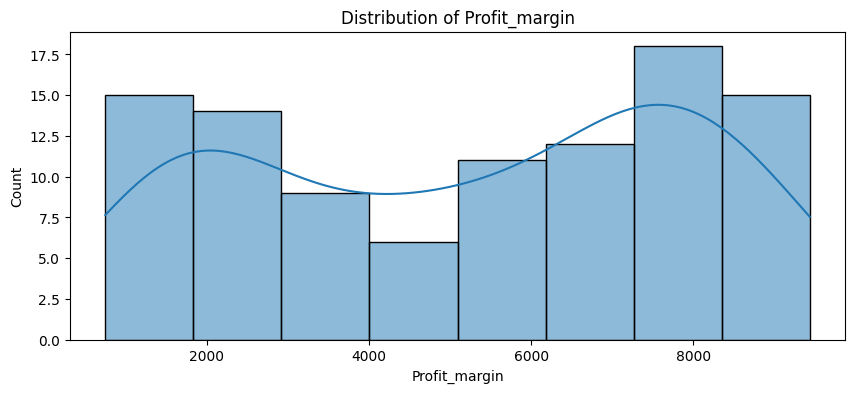

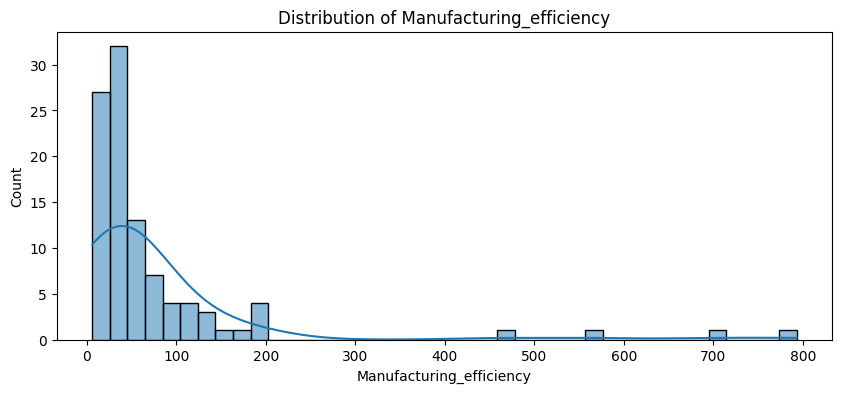

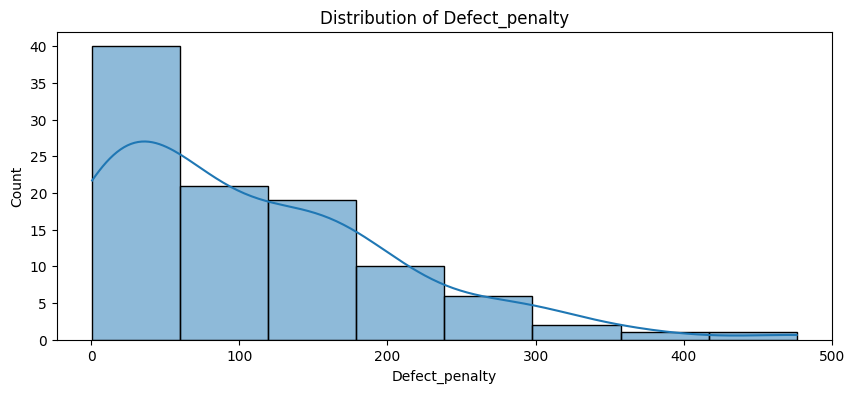

In [22]:
num_cols = df_fe.select_dtypes(include=['float64', 'int64']).columns

for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_fe[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


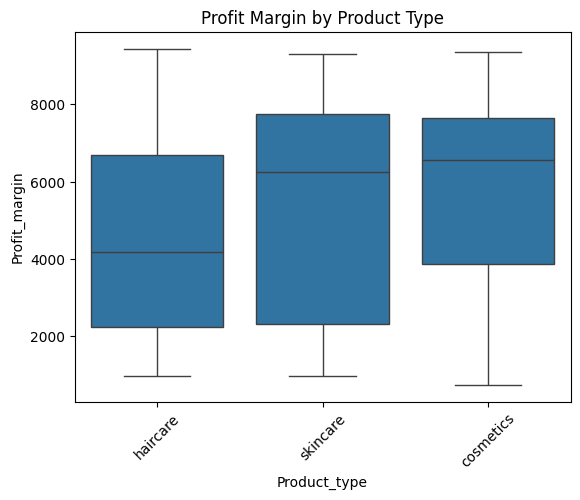

In [24]:

sns.boxplot(data=df_fe, x='Product_type', y='Profit_margin')
plt.xticks(rotation=45)
plt.title("Profit Margin by Product Type")
plt.show()


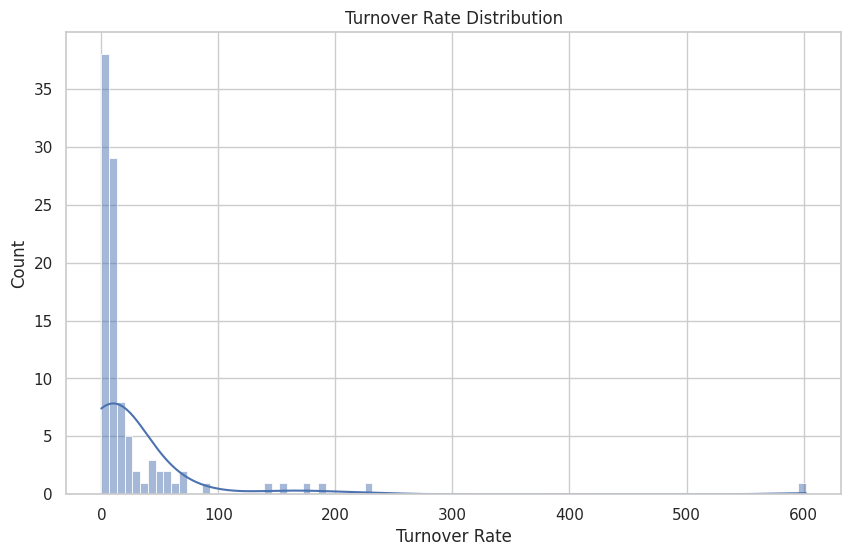

In [30]:

# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# 1. Turnover Rate
sns.histplot(df_fe['Turnover_rate'], kde=True)
plt.title("Turnover Rate Distribution")
plt.xlabel("Turnover Rate")
plt.show()




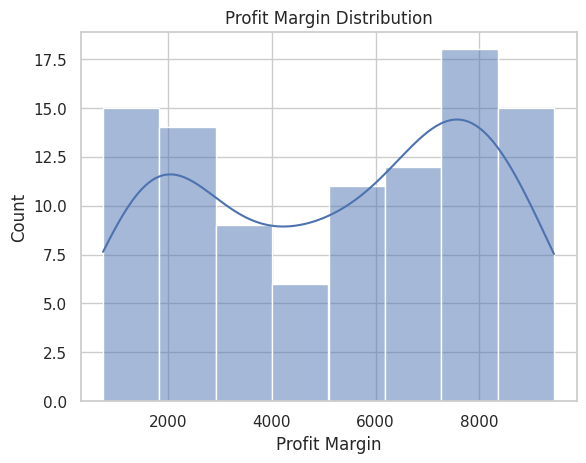

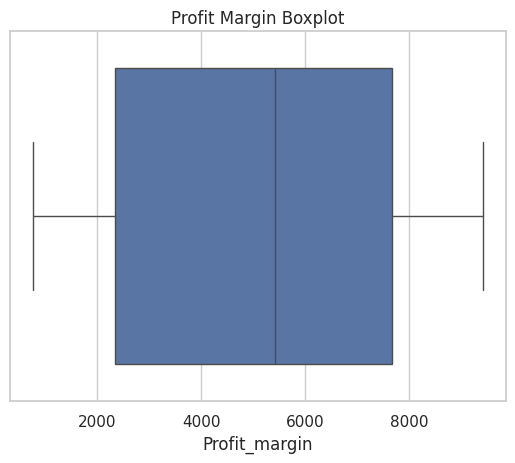

In [26]:
# 2. Profit Margin
sns.histplot(df_fe['Profit_margin'], kde=True)
plt.title("Profit Margin Distribution")
plt.xlabel("Profit Margin")
plt.show()

sns.boxplot(x=df_fe['Profit_margin'])
plt.title("Profit Margin Boxplot")
plt.show()



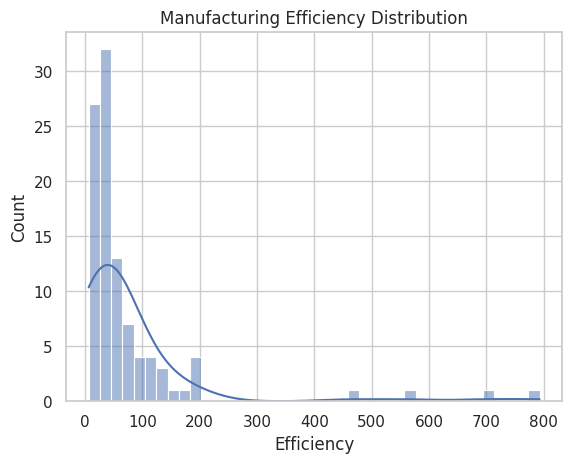

In [27]:
# 3. Manufacturing Efficiency
sns.histplot(df_fe['Manufacturing_efficiency'], kde=True)
plt.title("Manufacturing Efficiency Distribution")
plt.xlabel("Efficiency")
plt.show()



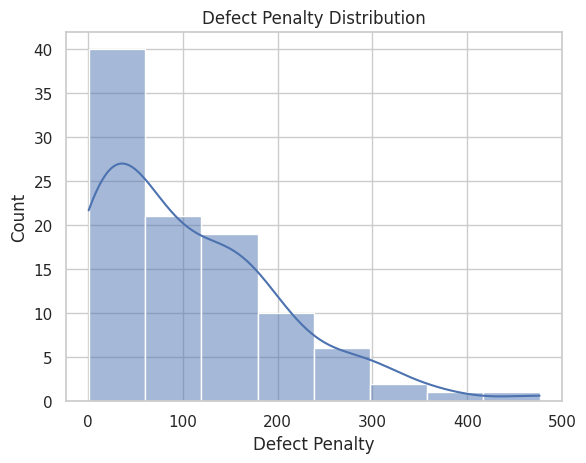

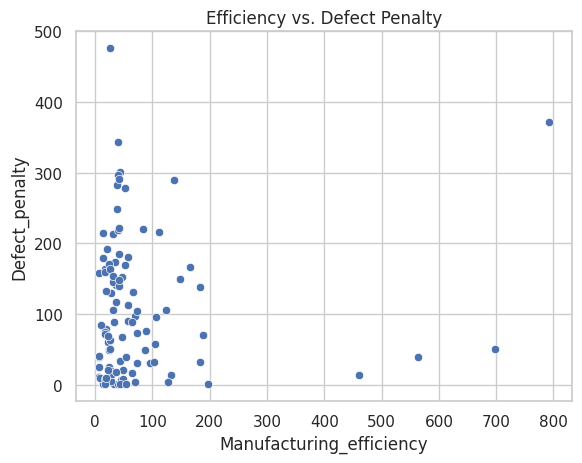

In [28]:
# 4. Defect Penalty
sns.histplot(df_fe['Defect_penalty'], kde=True)
plt.title("Defect Penalty Distribution")
plt.xlabel("Defect Penalty")
plt.show()

# Scatter plot: Efficiency vs. Defect Penalty
sns.scatterplot(data=df_fe, x='Manufacturing_efficiency', y='Defect_penalty')
plt.title("Efficiency vs. Defect Penalty")
plt.show()




In [50]:
# List of relevant features for PCA
features = [
    'Price', 'Availability', 'Number_of_products_sold', 'Revenue_generated',
    'Stock_levels', 'Lead_times', 'Order_quantities', 'Shipping_times',
    'Shipping_costs', 'Lead_time', 'Production_volumes',
    'Manufacturing_lead_time', 'Manufacturing_costs', 'Defect_rates', 'Costs',
    'Turnover_rate', 'Profit_margin', 'Manufacturing_efficiency', 'Defect_penalty'
]


# Subset and scale the data
X = df_fe[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [51]:
# Apply PCA to get full component set
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


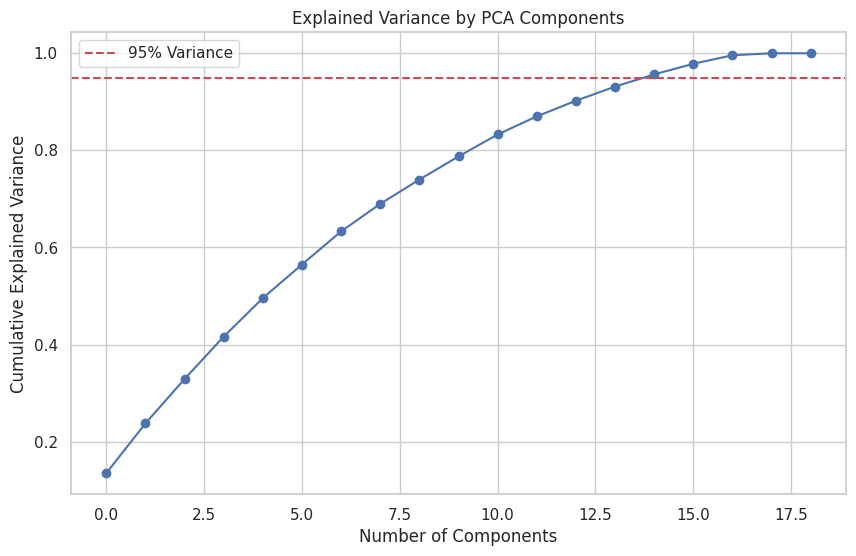

In [52]:

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()


In [79]:
pca_final = PCA(n_components=14)
X_pca_final = pca_final.fit_transform(X_scaled)

# Create DataFrame from PCA components
pca_columns = [f'PC{i+1}' for i in range(14)]
df_pca = pd.DataFrame(X_pca_final, columns=pca_columns)

In [87]:

umap = UMAP(n_components=5, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = umap.fit_transform(X_pca_final)

In [88]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=20, learning_rate=100, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_umap)
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])


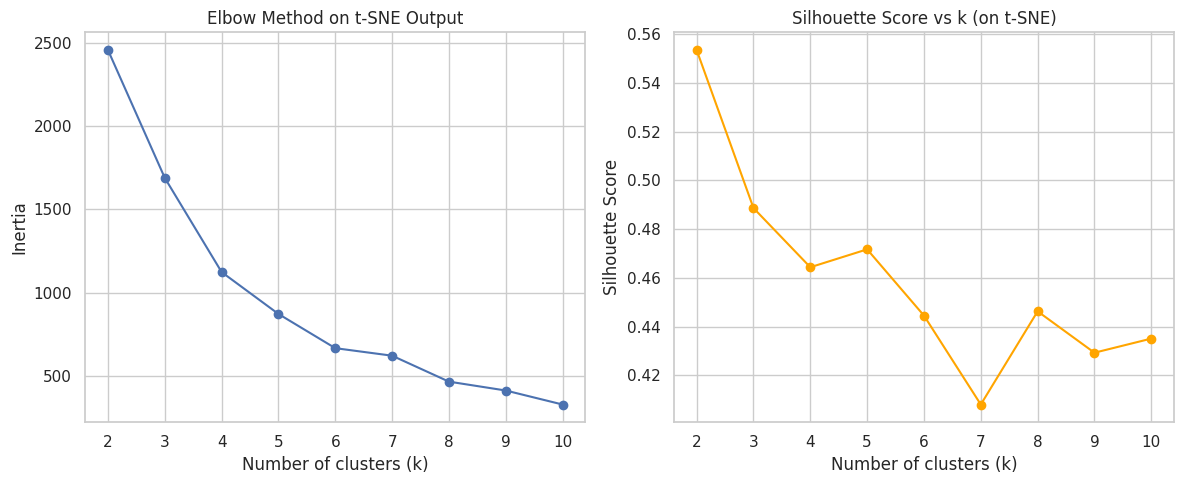

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X_tsne_features = df_tsne[['TSNE1', 'TSNE2']]  # ✅ renamed for clarity

inertias_tsne = []
silhouette_scores_tsne = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tsne_features)
    inertias_tsne.append(kmeans.inertia_)
    silhouette_scores_tsne.append(silhouette_score(X_tsne_features, labels))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertias_tsne, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method on t-SNE Output")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores_tsne, marker='o', color='orange')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs k (on t-SNE)")

plt.tight_layout()
plt.show()




In [91]:
# Final KMeans clustering using optimal k
optimal_k_tsne = silhouette_scores_tsne.index(max(silhouette_scores_tsne)) + 2
kmeans_tsne = KMeans(n_clusters=optimal_k_tsne, random_state=42)
df_tsne['KMeans_Cluster'] = kmeans_tsne.fit_predict(X_tsne_features)

print(f"Best silhouette score on t-SNE: {max(silhouette_scores_tsne):.4f} at k = {optimal_k_tsne}")

Best silhouette score on t-SNE: 0.5535 at k = 2


In [95]:
df_fe['Cluster'] = df_tsne['KMeans_Cluster']


In [96]:
# Original + engineered features for business insight
cols_to_analyze = [
    'Price', 'Stock_levels', 'Revenue_generated', 'Lead_times', 'Production_volumes',
    'Shipping_costs', 'Manufacturing_costs', 'Defect_rates', 'Costs',
    'Turnover_rate', 'Profit_margin', 'Manufacturing_efficiency', 'Defect_penalty'
]

summary_all = df_fe.groupby('Cluster')[cols_to_analyze].mean().round(2)
print("📊 Full Cluster Summary:\n", summary_all)


📊 Full Cluster Summary:
          Price  Stock_levels  Revenue_generated  Lead_times  \
Cluster                                                       
0        50.08          56.0            3670.93       15.41   
1        48.82          39.2            7967.09       16.53   

         Production_volumes  Shipping_costs  Manufacturing_costs  \
Cluster                                                            
0                    629.98            5.43                 55.3   
1                    503.16            5.67                 38.9   

         Defect_rates   Costs  Turnover_rate  Profit_margin  \
Cluster                                                       
0                2.34  532.83          18.98        3138.10   
1                2.21  525.52          38.60        7441.57   

         Manufacturing_efficiency  Defect_penalty  
Cluster                                            
0                          105.30          126.22  
1                           45.52       

In [ ]:
'''
✅ Recommendation Based on Analysis
Action	Target Cluster	Reason
Front-load / Easy-access zone	Cluster 1	Fast-moving, high-value products
Back storage / High-density racks	Cluster 0	Bulk SKUs with slower movement

Conclusion:
We clustered inventory SKUs into two groups using PCA → UMAP → t-SNE → KMeans with a silhouette score of 0.5535.
Cluster analysis revealed clear separation between bulk-manufactured, slow-turnover products and fast-moving, high-margin items.
This can be used to optimize warehouse storage: placing high-demand items closer to dispatch and using remote or dense zones for low-turnover stock.